# Exploratory analysis

**Initial edit:** *Lukas Vlcek, 2019-03-07*

* Data from Michels Gao's paper SI (ref: )

* Read clean data and explore basic relations between variables

## Setup

In [1]:
# Notebook settings

# code development settings (automatically reload modified modules)
%load_ext autoreload
%autoreload 2

# plotting backend
%matplotlib inline

In [485]:
# basic libraries
import os, sys
from itertools import product, combinations

# ML
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# project directories
data_raw = '../data/raw'
data_interim = '../data/interim'
data_processed = '../data/processed'
reports_dir = '../reports'
src_dir = '../src'

## Read data

In [6]:
# import CSV (which was exported from Excel), in need for a serious cleanup
df = pd.read_csv(os.path.join(data_interim, 'alloys_clean.csv'))

In [15]:
df.lattice = df.lattice.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 17 columns):
formula    355 non-null object
lattice    355 non-null category
density    355 non-null float64
DH_mix     355 non-null float64
DS_mix     355 non-null float64
T_m        355 non-null float64
Omega      355 non-null float64
delta      355 non-null float64
D_elneg    355 non-null float64
VEC        355 non-null float64
phi        355 non-null float64
RMS        355 non-null float64
DH_im      314 non-null float64
k_cr       355 non-null float64
eta        355 non-null float64
E2_E0      355 non-null float64
refs       351 non-null object
dtypes: category(1), float64(14), object(2)
memory usage: 45.0+ KB


In [16]:
df.head()

,formula,lattice,density,DH_mix,DS_mix,T_m,Omega,delta,D_elneg,VEC,phi,RMS,DH_im,k_cr,eta,E2_E0,refs
0,Ag1Au1,FCC,14.88,-6.0,5.76,1286.13,1.240000,0.35,0.31,11.0,3.146300e+02,0.35,1.370000,1.270000,0.50,0.06,[12]
1,Co1Fe1,FCC,8.37,-1.0,5.76,1789.50,10.310000,0.79,0.03,8.5,2.837100e+02,0.79,5.790000,3.270000,0.98,0.31,[12]
2,Co1Ni1,FCC,8.90,0.0,5.76,1748.00,inf,0.00,0.02,9.5,5.200000e+14,0.00,inf,inf,2.73,0.00,[12]
3,Cu1Ni1,FCC,8.91,4.0,5.76,1542.88,2.220000,1.19,0.01,10.5,7.744000e+01,1.19,-0.145000,1.490000,8.45,0.70,[12]
4,Fe1Ni1,FCC,8.37,-2.0,5.76,1769.50,5.100000,0.79,0.04,9.0,2.525500e+02,0.79,4.680000,2.120000,0.60,0.31,[12]


## Plot relationships

In [17]:
plt.style.use('ggplot')

In [265]:
def plot_all_pairs(dframe, cols, hue='lattice'):
    """
    Plot lattice categories as a function of pairs of variables
    """
    ncols = 4
    nrows = len(list(combinations(cols, 2)))//4 + 1
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, 5*nrows))
    for i, (x, y) in enumerate(combinations(cols, 2)):
        ir, ic = divmod(i, ncols)
        sns.scatterplot(x=x, y=y, hue=hue, data=df, ax=axs[ir, ic])
    
    plt.tight_layout()

In [266]:
# select columns suitable for plotting/exploring (adjusted after seeing the plots)
cols = list(df.columns)[2:-1]
cols.remove('RMS')
cols.remove('phi')
cols.remove('k_cr')
cols.remove('DH_im') # this could be important if we include compositions as a feature
cols.remove('eta')
cols.remove('Omega')
cols.remove('E2_E0')
print(cols)

['density', 'DH_mix', 'DS_mix', 'T_m', 'delta', 'D_elneg', 'VEC']


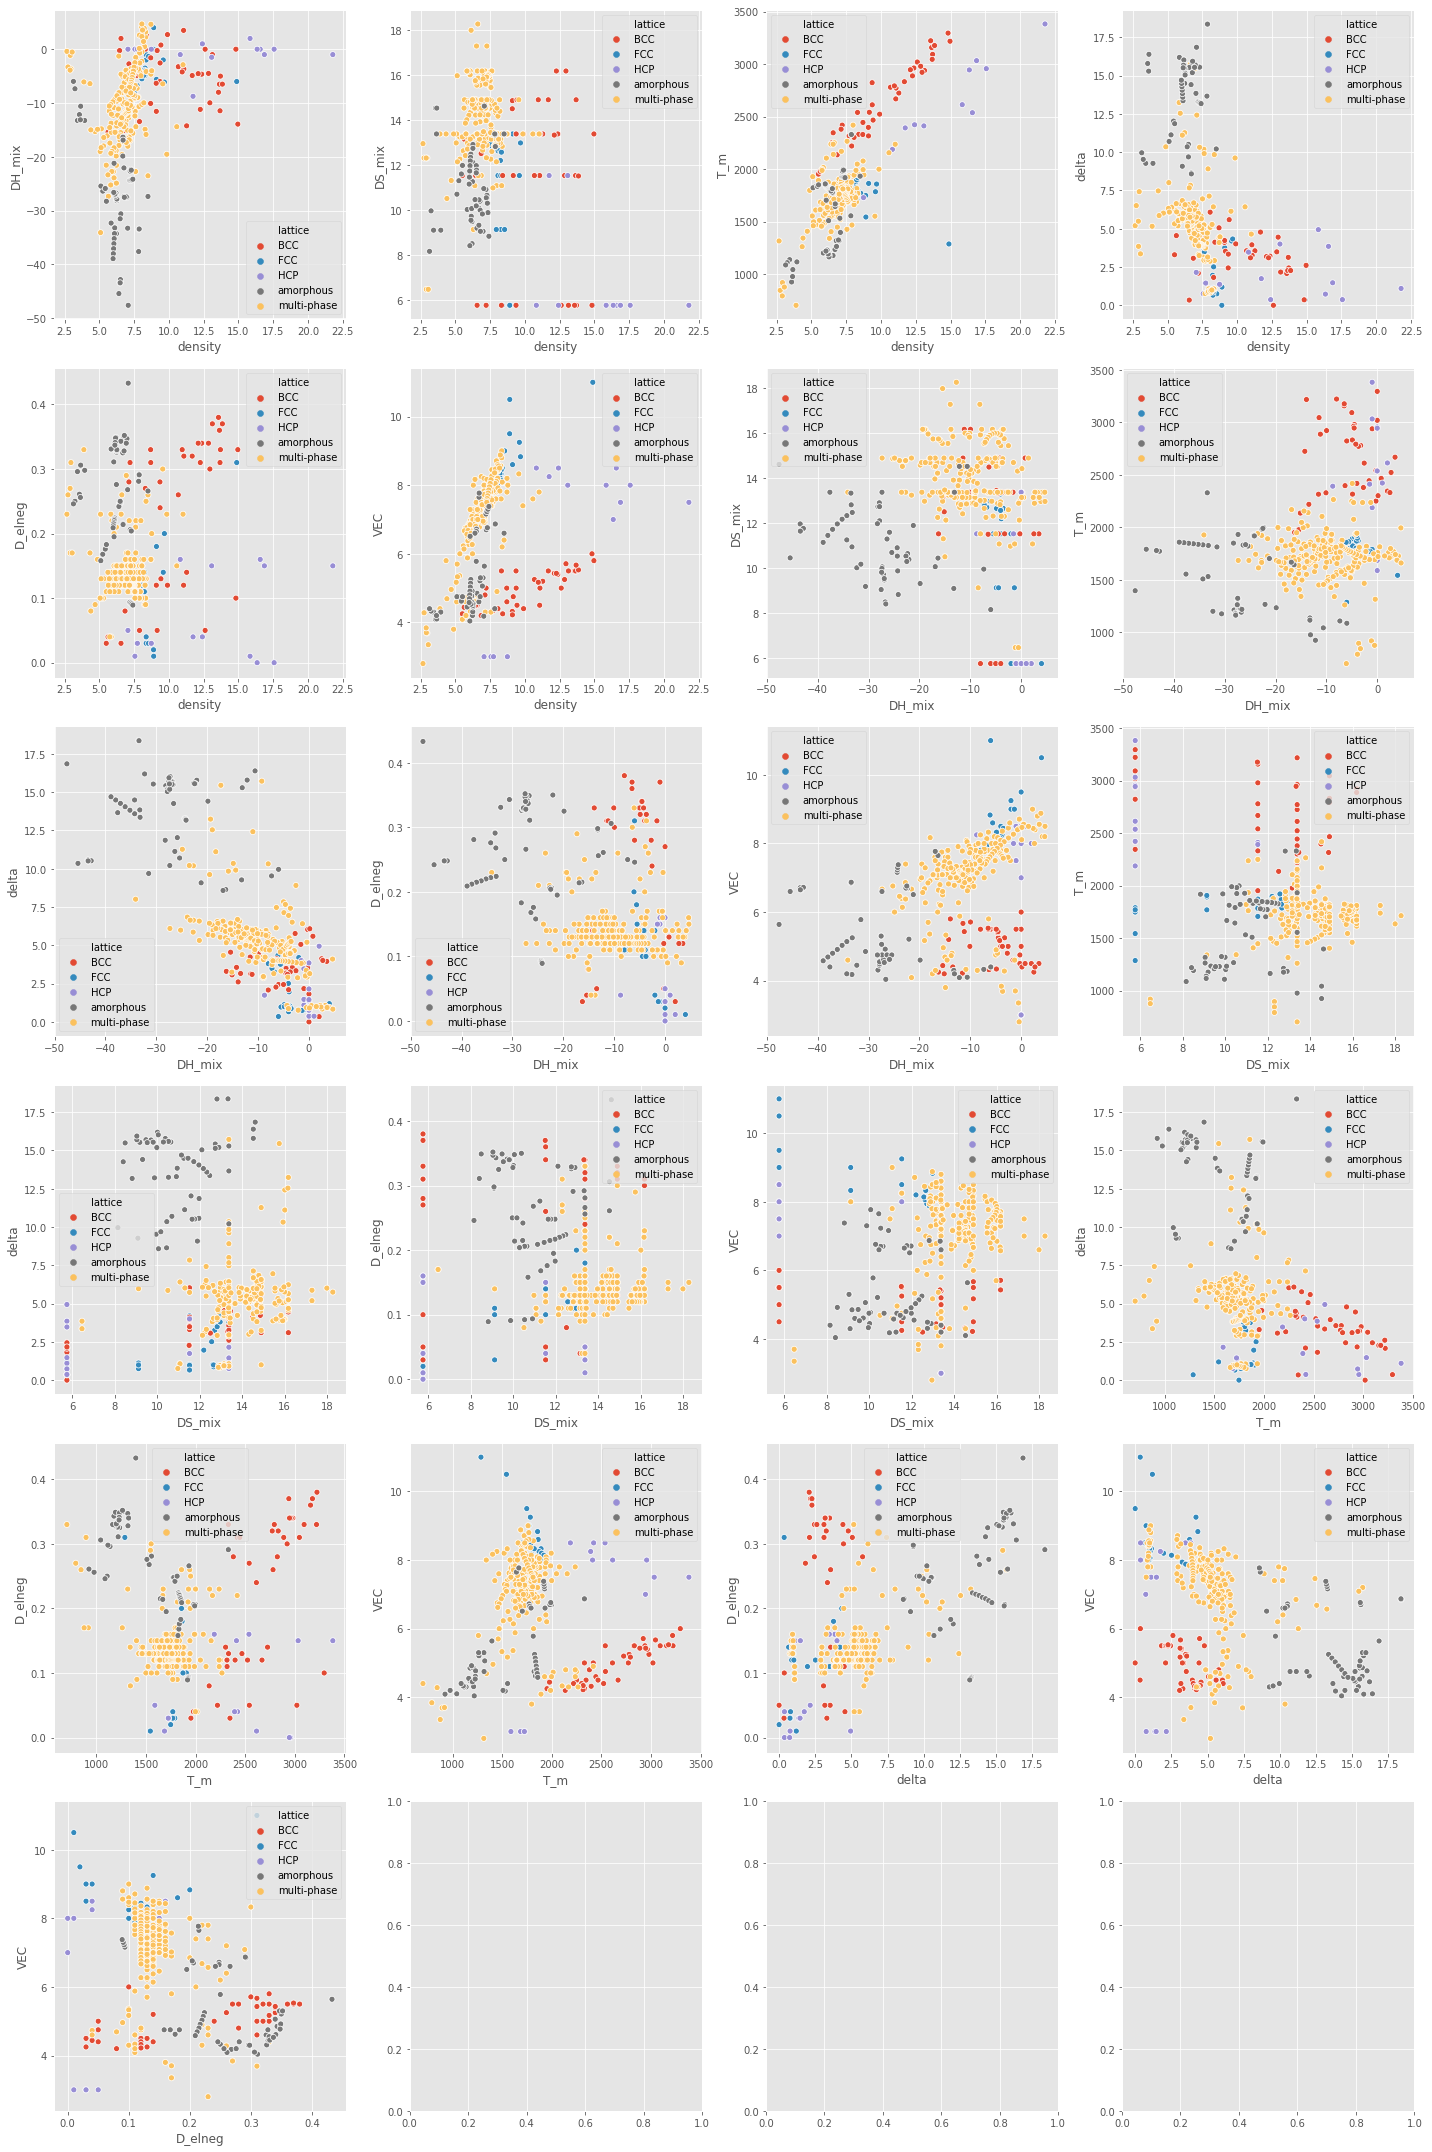

In [267]:
plot_all_pairs(df, cols[:], 'lattice')

## Prepare data for simple modeling

**For this exploration, simply drop rows with missing data**

In [310]:
df_xy = df[cols+['lattice']]
df_xy = df_xy.replace([np.inf, -np.inf], np.nan).dropna(how="any")
df_xy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355 entries, 0 to 354
Data columns (total 8 columns):
density    355 non-null float64
DH_mix     355 non-null float64
DS_mix     355 non-null float64
T_m        355 non-null float64
delta      355 non-null float64
D_elneg    355 non-null float64
VEC        355 non-null float64
lattice    355 non-null category
dtypes: category(1), float64(7)
memory usage: 22.7 KB


In [482]:
df_xy.to_csv(os.path.join(data_interim, 'alloys_model_ready.csv'), index=False)